In [112]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly as ply
import matplotlib.pyplot as plt
import matplotlib.ticker as xticks

In [113]:
Retention=pd.read_excel('D:\FilpRobo\customer_retention_dataset.xlsx')

In [114]:
Retention

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [115]:
Retention.shape

(269, 71)

In [116]:
NANds=Retention[Retention.columns[Retention.isnull().any()]]

In [117]:
NANds

""
0
1
2
3
4
...
264
265
266
267


In [118]:
Retention.isnull().sum()!=0

1Gender of respondent                                                   False
2 How old are you?                                                      False
3 Which city do you shop online from?                                   False
4 What is the Pin Code of where you shop online from?                   False
5 Since How Long You are Shopping Online ?                              False
                                                                        ...  
Longer delivery period                                                  False
Change in website/Application design                                    False
Frequent disruption when moving from one page to another                False
Website is as efficient as before                                       False
Which of the Indian online retailer would you recommend to a friend?    False
Length: 71, dtype: bool

Seggregating the ordinal and categorical columns from data set to get the insgihts further

In [127]:
Retention.columns=Retention.columns.str.rstrip()

In [129]:
Retention.columns

Index(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

Ignoring the unwanted columns

In [133]:
#retention_features=Retention.iloc[:, :Retention.columns.get_loc('From the following, tick any (or all) of the online retailers you have shopped from;')+ 1]                                              ') ]

retention_features=Retention.iloc[:,:Retention.columns.get_loc('From the following, tick any (or all) of the online retailers you have shopped from;') + 1]

In [134]:
##retention_last=retention_features.append((Retention.iloc[:, 70:Retention.columns.get_loc('Which of the Indian online retailer would you recommend to a friend?') + 1]),ignore_index=True)

In [135]:
retention_features

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;"
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com"
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Agree (4),Agree (4),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Strongly disagree (1),Strongly agree (5),Strongly disagree (1),Strongly agree (5),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Agree (4),indifferent (3),Disagree (2),indifferent (3),Dis-agree (2),Agree (4),indifferent (3),Agree (4),indifferent (3),Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com"
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,indifferent (3),Strongly agree (5),Agree (4),Agree (4),Dis-agree (2),indifferent (3),Agree (4),Agree (4),Agree (4),"Amazon.in, Flipkart.com, Snapdeal.com"
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),indifferent (3),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"


In [137]:
numerical_feature=[feature for feature in retention_features.columns if retention_features[feature].dtypes!='O']
descrete_feature=[feature for feature in numerical_feature if len(retention_features[feature].unique())<25]
cont_feature=[feature for feature in numerical_feature if feature not in descrete_feature]
category_feature=[feature for feature in retention_features.columns if feature not in numerical_feature]

In [138]:
category_feature

['1Gender of respondent',
 '2 How old are you?',
 '3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?',
 '10 What is the operating system (OS) of your device?',
 '11 What browser do you run on your device to access the website?',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?',
 '13 After first visit, how do you reach the online retail store?',
 '14 How much time do you explore the e- retail store before making a purchase decision?',
 '15 What is your preferred payment Option?',
 '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
 '17 Why did you abandon the “Bag”, “Shopping Cart”?',
 '18 The content o

In [139]:
cont_feature

['4 What is the Pin Code of where you shop online from?']

In [140]:
descrete_feature

[]

In [141]:
numerical_feature

['4 What is the Pin Code of where you shop online from?']

In [142]:
#countplot catplot with - ordinal_data  distplot on money

As the analysis for rentention of customers, 
I have understood that how long a single customer is been purchased with one of the online purchasing websites.
here I am considering the two columns for retention data
1. Since How Long You are Shopping Online ?

In [143]:
retention_features.columns.values

array(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

Removing \t from columns

In [144]:
retention_features.columns = retention_features.columns.str.replace('\t', '')

In [145]:
retention_features.columns.values

array(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (sel

In [146]:
#retention_features_check = (text.split(retention_features['47 Getting value for money spent'], 1)[0])

In [147]:
retention_features

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;"
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com"
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Agree (4),Agree (4),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Strongly disagree (1),Strongly agree (5),Strongly disagree (1),Strongly agree (5),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Agree (4),indifferent (3),Disagree (2),indifferent (3),Dis-agree (2),Agree (4),indifferent (3),Agree (4),indifferent (3),Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com"
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,indifferent (3),Strongly agree (5),Agree (4),Agree (4),Dis-agree (2),indifferent (3),Agree (4),Agree (4),Agree (4),"Amazon.in, Flipkart.com, Snapdeal.com"
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),indifferent (3),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"


Renaming dataframe column for better readability

In [148]:
retcolumn=[]
for i in retention_features.columns:
    retcolumn.append(i)

In [149]:
retcolumn

['1Gender of respondent',
 '2 How old are you?',
 '3 Which city do you shop online from?',
 '4 What is the Pin Code of where you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?',
 '10 What is the operating system (OS) of your device?',
 '11 What browser do you run on your device to access the website?',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?',
 '13 After first visit, how do you reach the online retail store?',
 '14 How much time do you explore the e- retail store before making a purchase decision?',
 '15 What is your preferred payment Option?',
 '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
 '17 Why did yo

In [150]:
retention_features.dtypes

1Gender of respondent                                                                                           object
2 How old are you?                                                                                              object
3 Which city do you shop online from?                                                                           object
4 What is the Pin Code of where you shop online from?                                                            int64
5 Since How Long You are Shopping Online ?                                                                      object
6 How many times you have made an online purchase in the past 1 year?                                           object
7 How do you access the internet while shopping on-line?                                                        object
8 Which device do you use to access the online shopping?                                                        object
9 What is the screen size of your mobile device?

getting unique values from each columns

In [151]:
for col in retention_features:
    print(col,": ",retention_features[col].unique())

1Gender of respondent :  ['Male' 'Female']
2 How old are you? :  ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
3 Which city do you shop online from? :  ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
4 What is the Pin Code of where you shop online from? :  [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]
5 Since How Long You are Shopping Online ? :  ['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']
6 How many times you have made an online purchase in the past 1 year? :  ['31-40 times' '41 times and above' 'Less than 10 times' '11-20 times'
 '21-30 times' '42 times and above']
7 How do you access the internet while shopping 

As the analysis for rentention of customers, 
I have understood that how long a single customer is been purchased with one of the online purchasing websites.
here I am considering the two columns for retention data
From the following, tick any (or all) of the online retailers you have shopped from;

Text(0.5, 1.0, 'target variable count per category')

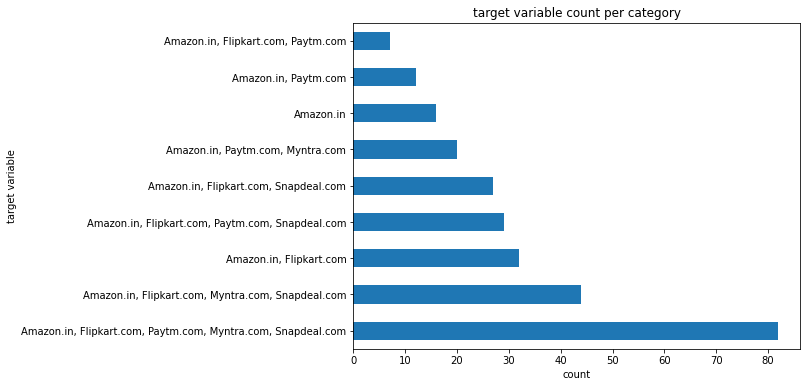

In [152]:
retention_features['From the following, tick any (or all) of the online retailers you have shopped from;'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('count')
plt.ylabel('target variable')
plt.title('target variable count per category')

In [156]:
retention_features['From the following, tick any (or all) of the online retailers you have shopped from;'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;, dtype: int64

There are nearly 100 members are reatining on online shppoing for above 4 years

In [157]:
retention_features['From the following, tick any (or all) of the online retailers you have shopped from;'].value_counts()*100/len(retention_features['From the following, tick any (or all) of the online retailers you have shopped from;'])

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30.483271
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               16.356877
Amazon.in, Flipkart.com                                         11.895911
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                10.780669
Amazon.in, Flipkart.com, Snapdeal.com                           10.037175
Amazon.in, Paytm.com, Myntra.com                                 7.434944
Amazon.in                                                        5.947955
Amazon.in, Paytm.com                                             4.460967
Amazon.in, Flipkart.com, Paytm.com                               2.602230
Name: From the following, tick any (or all) of the online retailers you have shopped from;, dtype: float64

Nearly 30% percent members are retained in Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com

In [160]:
Featurecolumn=retention_features.copy()

In [161]:
Featurecolumn

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;"
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com"
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Agree (4),Agree (4),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Strongly disagree (1),Strongly agree (5),Strongly disagree (1),Strongly agree (5),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Agree (4),indifferent (3),Disagree (2),indifferent (3),Dis-agree (2),Agree (4),indifferent (3),Agree (4),indifferent (3),Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com"
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,indifferent (3),Strongly agree (5),Agree (4),Agree (4),Dis-agree (2),indifferent (3),Agree (4),Agree (4),Agree (4),"Amazon.in, Flipkart.com, Snapdeal.com"
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),indifferent (3),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"


C:\Users\smile\AppData\Local\Temp/ipykernel_19168/735878354.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


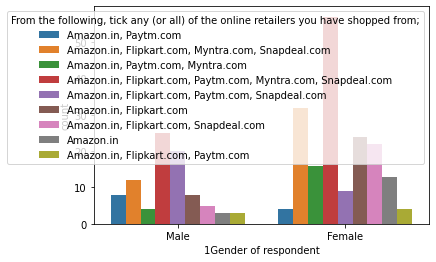

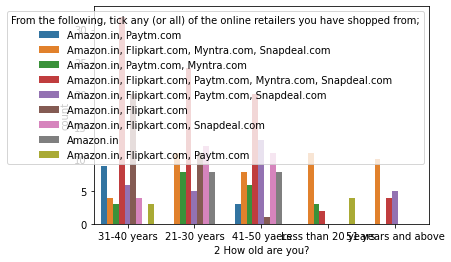

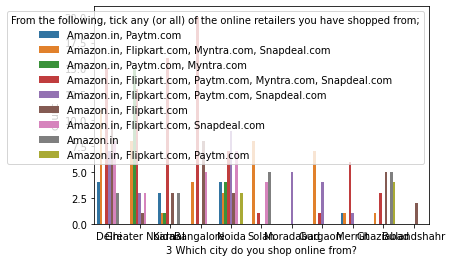

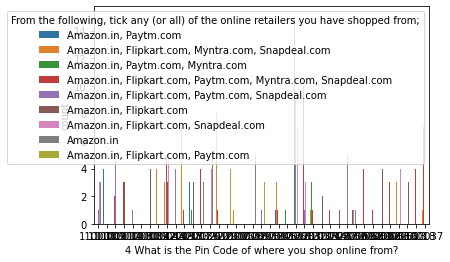

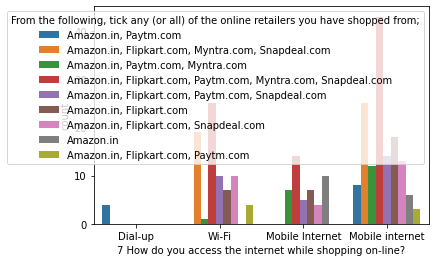

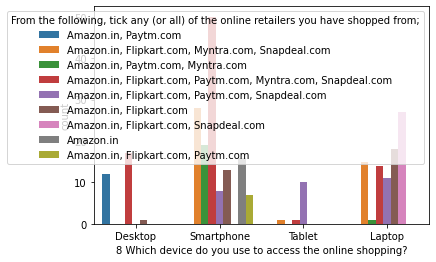

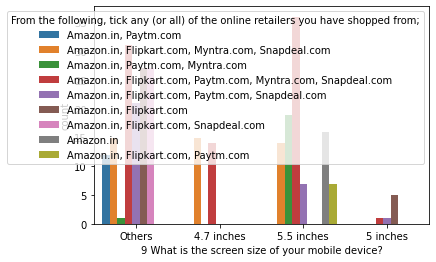

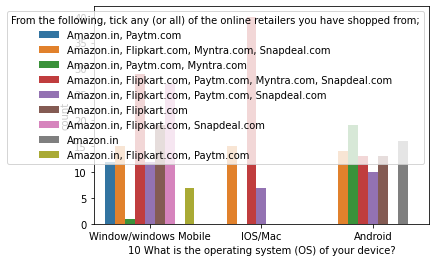

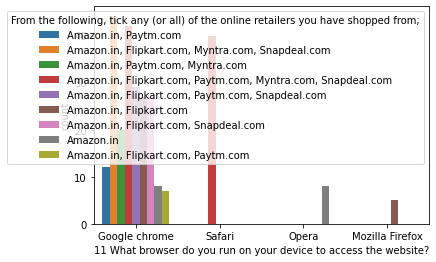

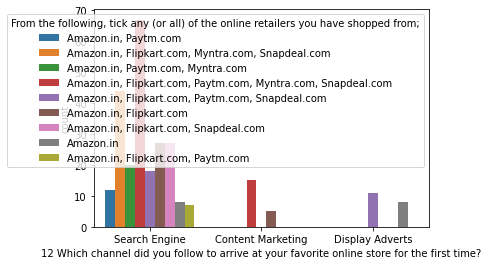

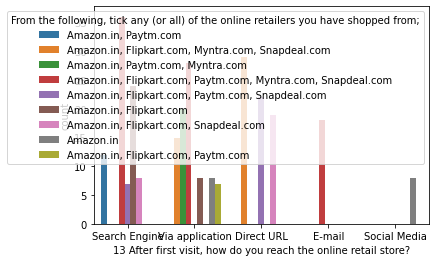

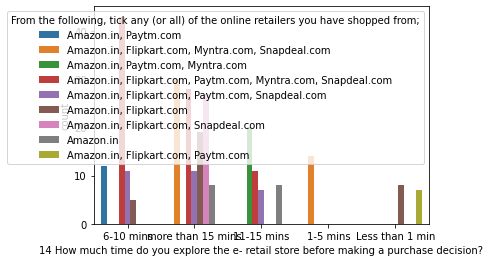

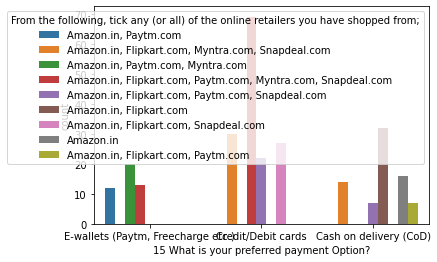

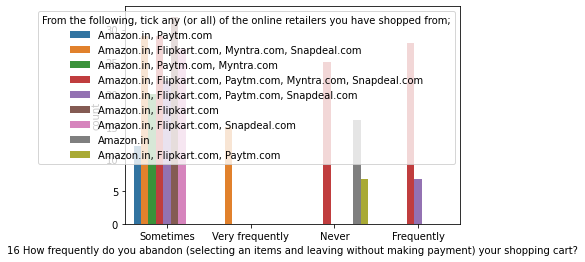

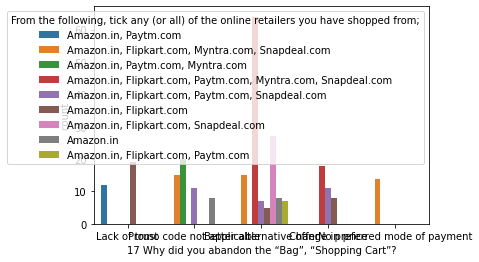

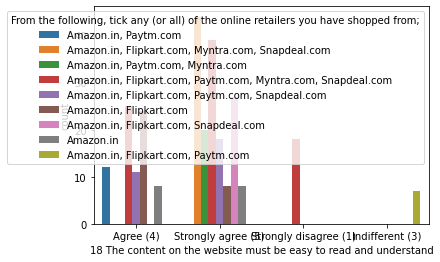

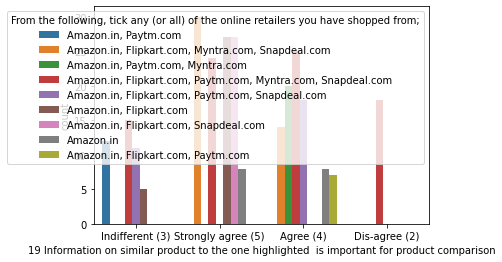

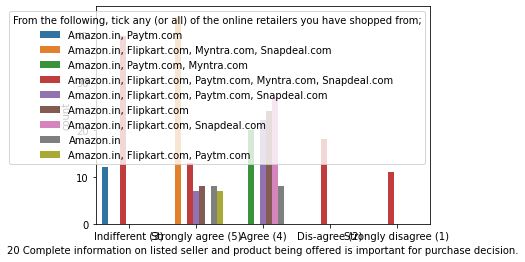

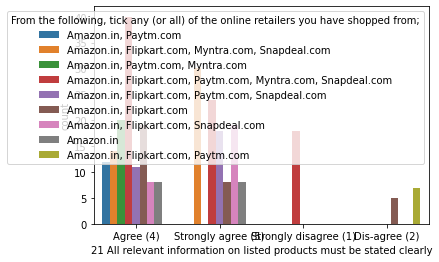

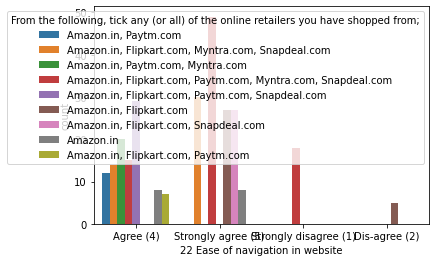

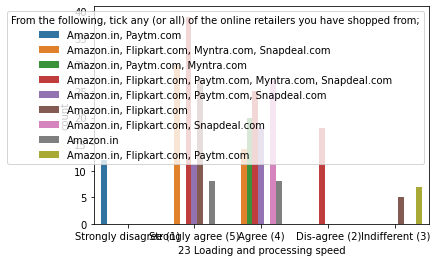

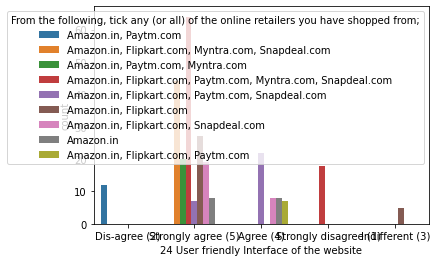

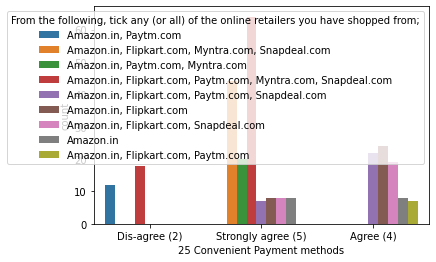

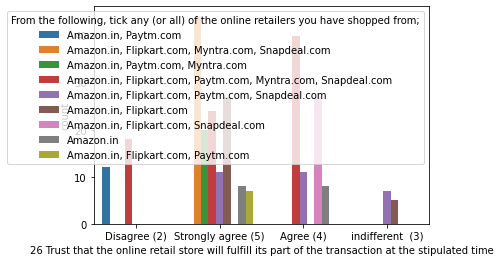

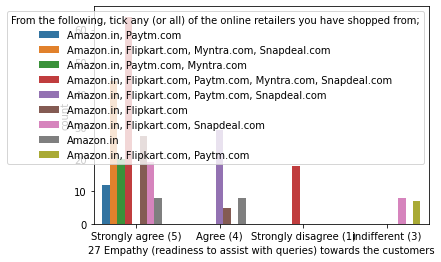

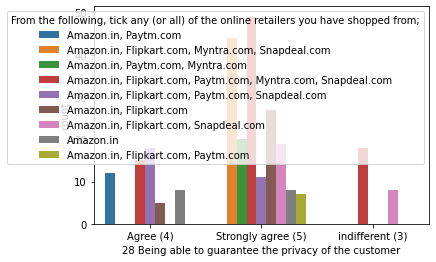

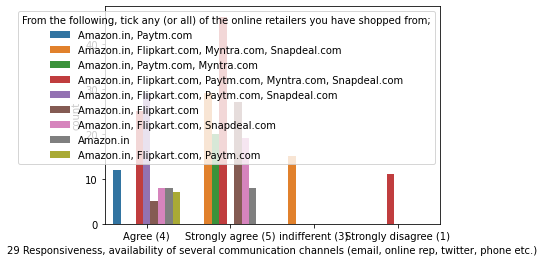

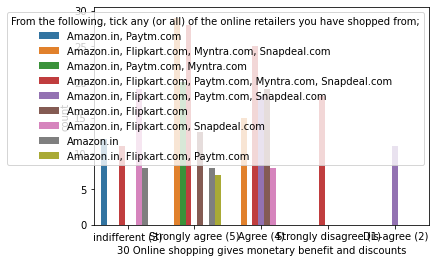

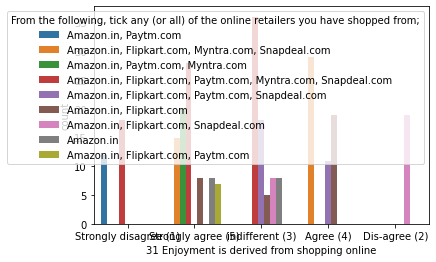

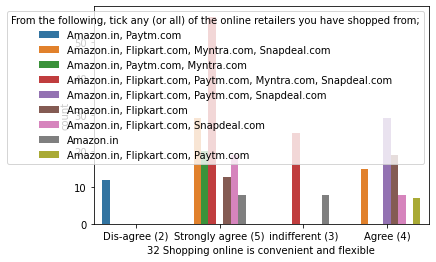

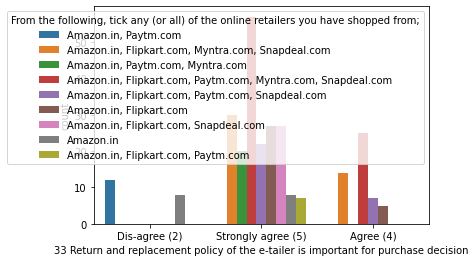

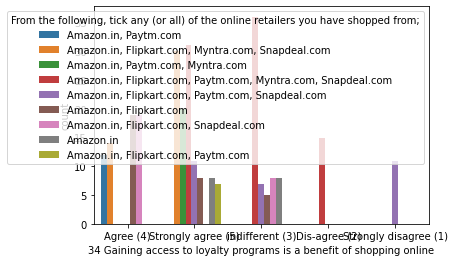

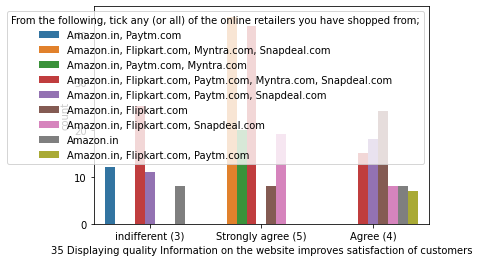

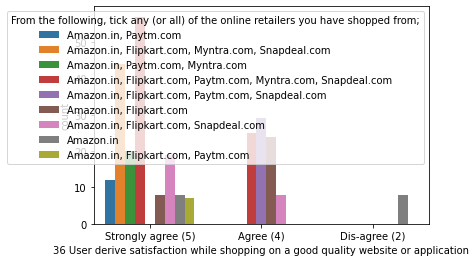

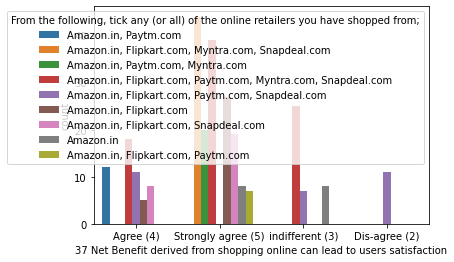

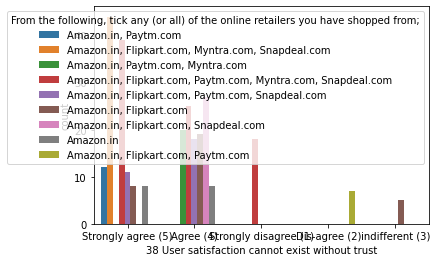

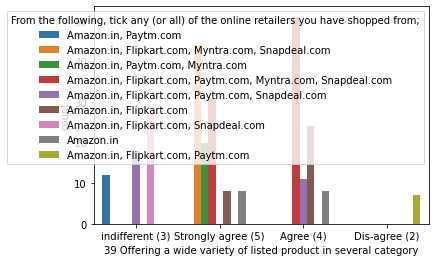

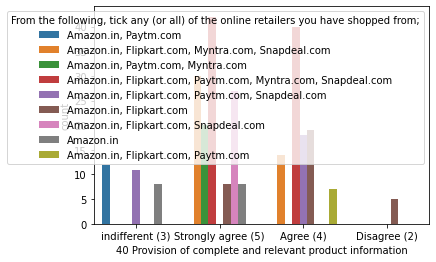

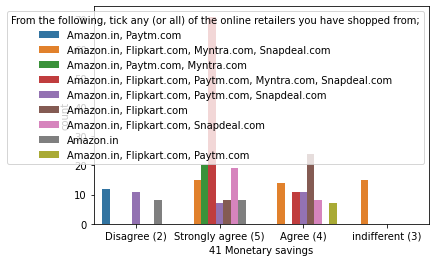

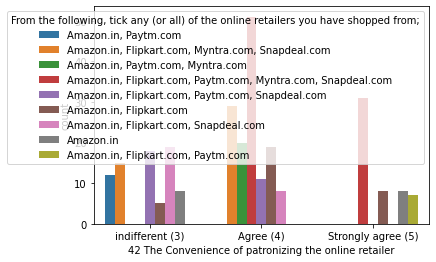

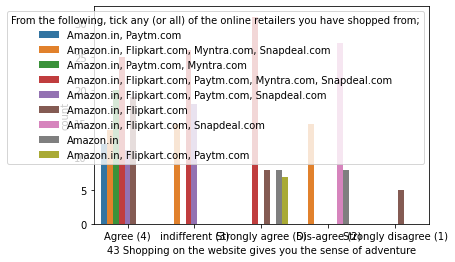

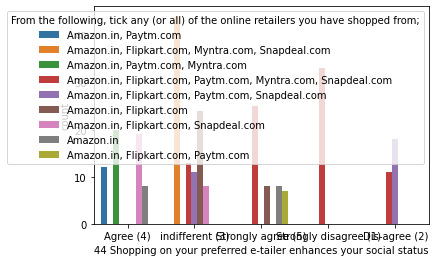

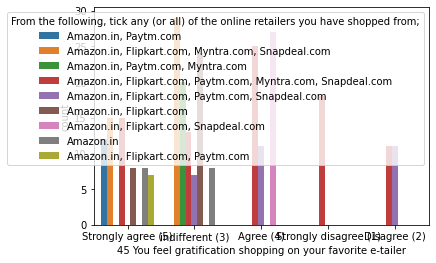

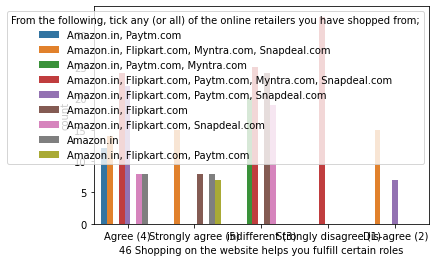

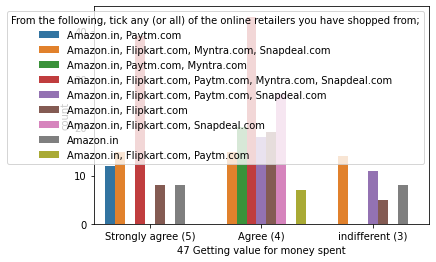

In [163]:
for i, attribute in enumerate(retention_features.drop(columns=['From the following, tick any (or all) of the online retailers you have shopped from;','5 Since How Long You are Shopping Online ?','6 How many times you have made an online purchase in the past 1 year?'])):
    plt.figure(i)
    sns.countplot(data=retention_features,x=attribute,hue='From the following, tick any (or all) of the online retailers you have shopped from;')

females are  mostly in retained in Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com